In [ ]:
+ stat desc sur la base
+ reg 
+ tests

In [ ]:
Selection des variables d'amenites 
Regressions sans amenites, methode loyers reels vs loyers imputés -> 
Regressions avec amenites

In [ ]:
Selection des variables d'amenites

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan



In [2]:
total_dataset_clean = pd.read_stata("data_base_enrichie_totalement_clean.dta") 


In [3]:
total_dataset_clean

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,REGIS,P6016,gender,P6030S1,P6030S3,age,...,own_status,territory,rent_reel,log_rent_reel,rent_reel_uc,log_rent_reel_uc,imputed_rent,log_imputed_rent,imputed_rent_uc,log_imputed_rent_uc
0,6037206.0,1.0,1.0,1.0,10,1.0,1.0,1.0,1963.0,58.0,...,0,3,800000.0,13.592367,565685.424949,13.245793,800000.0,13.592367,565685.424949,13.592367
1,6037207.0,1.0,1.0,1.0,10,1.0,1.0,1.0,1979.0,42.0,...,0,3,750000.0,13.527828,283473.354757,12.554873,750000.0,13.527828,283473.354757,13.527828
2,6037209.0,1.0,1.0,1.0,10,1.0,2.0,11.0,1977.0,44.0,...,0,3,700000.0,13.458836,494974.746831,13.112262,700000.0,13.458836,494974.746831,13.458836
3,6037210.0,1.0,1.0,1.0,10,1.0,1.0,8.0,1972.0,49.0,...,0,3,750000.0,13.527828,433012.701892,12.978522,750000.0,13.527828,433012.701892,13.527828
4,6037211.0,1.0,1.0,1.0,10,1.0,2.0,8.0,1986.0,35.0,...,0,3,740000.0,13.514405,427239.199200,12.965099,740000.0,13.514405,427239.199200,13.514405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26625,6062932.0,1.0,1.0,1.0,10,1.0,2.0,6.0,1965.0,56.0,...,0,8,200000.0,12.206073,200000.000000,12.206073,200000.0,12.206073,200000.000000,12.206073
26626,6062935.0,1.0,1.0,1.0,10,1.0,2.0,6.0,1981.0,40.0,...,1,8,NaN,NaN,NaN,NaN,250000.0,12.429216,144337.567297,12.429216
26627,6062936.0,1.0,1.0,1.0,10,1.0,1.0,5.0,1961.0,60.0,...,1,8,NaN,NaN,NaN,NaN,80000.0,11.289782,40000.000000,11.289782
26628,6062950.0,1.0,1.0,1.0,10,1.0,1.0,2.0,1995.0,26.0,...,1,8,NaN,NaN,NaN,NaN,150000.0,11.918391,106066.017178,11.918391


In [4]:

y_method_A_reg1 = total_dataset_clean[['log_rent_reel','log_rent_reel_uc']]
X_reg_sans_amenite_sans_ownership = total_dataset_clean[['Numrooms', 'Utilrank', 'territory', 'level_educ', 'age', 'marital_status', 'gender']]

data_A_reg1 = pd.concat([X_reg_sans_amenite_sans_ownership, y_method_A_reg1], axis=1).dropna()
data_A_reg1

,Numrooms,Utilrank,territory,level_educ,age,marital_status,gender,log_rent_reel,log_rent_reel_uc
0,4.0,3.0,3,5.0,58.0,3.0,1.0,13.592367,13.245793
1,6.0,3.0,3,5.0,42.0,2.0,1.0,13.527828,12.554873
2,4.0,3.0,3,5.0,44.0,6.0,2.0,13.458836,13.112262
3,4.0,3.0,3,5.0,49.0,2.0,1.0,13.527828,12.978522
4,4.0,3.0,3,6.0,35.0,4.0,2.0,13.514405,12.965099
...,...,...,...,...,...,...,...,...,...
26508,4.0,1.0,8,6.0,36.0,3.0,1.0,12.765688,11.960969
26510,3.0,1.0,8,5.0,33.0,4.0,2.0,12.206073,11.656767
26553,2.0,1.0,12,5.0,20.0,2.0,2.0,11.156251,10.463103
26614,3.0,1.0,4,5.0,36.0,3.0,1.0,12.611538,12.062232


In [5]:
data_A_reg1['Utilrank'] = data_A_reg1['Utilrank'].astype(int)
data_A_reg1['territory'] = data_A_reg1['territory'].astype(int)

In [6]:
data_A_reg1

,Numrooms,Utilrank,territory,level_educ,age,marital_status,gender,log_rent_reel,log_rent_reel_uc
0,4.0,3,3,5.0,58.0,3.0,1.0,13.592367,13.245793
1,6.0,3,3,5.0,42.0,2.0,1.0,13.527828,12.554873
2,4.0,3,3,5.0,44.0,6.0,2.0,13.458836,13.112262
3,4.0,3,3,5.0,49.0,2.0,1.0,13.527828,12.978522
4,4.0,3,3,6.0,35.0,4.0,2.0,13.514405,12.965099
...,...,...,...,...,...,...,...,...,...
26508,4.0,1,8,6.0,36.0,3.0,1.0,12.765688,11.960969
26510,3.0,1,8,5.0,33.0,4.0,2.0,12.206073,11.656767
26553,2.0,1,12,5.0,20.0,2.0,2.0,11.156251,10.463103
26614,3.0,1,4,5.0,36.0,3.0,1.0,12.611538,12.062232


In [7]:
mod = smf.ols(formula='log_rent_reel ~ Numrooms+ C(Utilrank)+ C(territory)+ level_educ+ age+ marital_status+ gender', data=data_A_reg1)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_rent_reel   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     562.8
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:51:44   Log-Likelihood:                -5633.1
No. Observations:               11766   AIC:                         1.131e+04
Df Residuals:                   11743   BIC:                         1.148e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.9920      0.033    362.432      0.000      11.927      12.057
C(Utilrank)[T.2]       0.2418      0.009     25.573      0.000       0.223       0.260
C(Utilrank)[T.3]       0.4494      0.011     41.861      0.000       0.428       0.470
C(Utilrank)[T.4]       0.7859      0.017     46.381      0.000       0.753       0.819
C(Utilrank)[T.5]       0.9655      0.032     30.627      0.000       0.904       1.027
C(Utilrank)[T.6]       1.3315      0.048     27.800      0.000       1.238       1.425
C(Utilrank)[T.9]      -0.4736      0.047    -10.090      0.000      -0.566      -0.382
C(territory)[T.2]   5.772e-15      0.027   2.11e-13      1.000      -0.054       0.054
C(territory)[T.3]     -0.1727      0.023     -7.402      0.000      -0.218      -0.127
C(territory)[T.4]     -0.2356      0.023    -10.360      0.000      -0.280      -0.191
C(territory)[T.5]     -0.2381      0.023    -10.436      0.000      -0.283      -0.193
C(territory)[T.6]     -0.2976      0.022    -13.274      0.000      -0.342      -0.254
C(territory)[T.7]     -0.2879      0.022    -13.320      0.000      -0.330      -0.246
C(territory)[T.8]     -0.3223      0.021    -15.054      0.000      -0.364      -0.280
C(territory)[T.9]     -0.3449      0.022    -15.947      0.000      -0.387      -0.303
C(territory)[T.10]    -0.8381      0.055    -15.320      0.000      -0.945      -0.731
C(territory)[T.11]    -0.3820      0.023    -16.808      0.000      -0.427      -0.337
C(territory)[T.12]    -0.6760      0.056    -11.994      0.000      -0.786      -0.566
Numrooms               0.1855      0.004     50.428      0.000       0.178       0.193
level_educ             0.0769      0.004     21.655      0.000       0.070       0.084
age                    0.0025      0.000      8.414      0.000       0.002       0.003
marital_status        -0.0088      0.003     -3.333      0.001      -0.014      -0.004
gender                -0.0134      0.008     -1.744      0.081      -0.028       0.002
==============================================================================
Omnibus:                     2063.703   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42235.920
Skew:                           0.226   Prob(JB):                         0.00
Kurtosis:                      12.271   Cond. No.                         953.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#reduction des coefficients avec unite de consommation (composition du menage)
#on veut reduire l'effet taille des menages 

mod = smf.ols(formula='log_rent_reel_uc ~ Numrooms+ C(Utilrank)+ C(territory)+ level_educ+ age+ marital_status+ gender', data=data_A_reg1)
res = mod.fit()
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_rent_reel_uc   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     483.4
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:51:49   Log-Likelihood:                -6961.1
No. Observations:               11766   AIC:                         1.397e+04
Df Residuals:                   11743   BIC:                         1.414e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.3491      0.037    306.391      0.000      11.276      11.422
C(Utilrank)[T.2]       0.2733      0.011     25.821      0.000       0.253       0.294
C(Utilrank)[T.3]       0.5269      0.012     43.841      0.000       0.503       0.550
C(Utilrank)[T.4]       0.9269      0.019     48.864      0.000       0.890       0.964
C(Utilrank)[T.5]       1.1268      0.035     31.928      0.000       1.058       1.196
C(Utilrank)[T.6]       1.4596      0.054     27.221      0.000       1.354       1.565
C(Utilrank)[T.9]      -0.4696      0.053     -8.937      0.000      -0.573      -0.367
C(territory)[T.2]   3.552e-15      0.031   1.16e-13      1.000      -0.060       0.060
C(territory)[T.3]     -0.1133      0.026     -4.338      0.000      -0.165      -0.062
C(territory)[T.4]     -0.1708      0.025     -6.709      0.000      -0.221      -0.121
C(territory)[T.5]     -0.2389      0.026     -9.350      0.000      -0.289      -0.189
C(territory)[T.6]     -0.2810      0.025    -11.195      0.000      -0.330      -0.232
C(territory)[T.7]     -0.2302      0.024     -9.516      0.000      -0.278      -0.183
C(territory)[T.8]     -0.2595      0.024    -10.825      0.000      -0.306      -0.212
C(territory)[T.9]     -0.3000      0.024    -12.391      0.000      -0.347      -0.253
C(territory)[T.10]    -0.8050      0.061    -13.144      0.000      -0.925      -0.685
C(territory)[T.11]    -0.2908      0.025    -11.428      0.000      -0.341      -0.241
C(territory)[T.12]    -0.6149      0.063     -9.746      0.000      -0.739      -0.491
Numrooms               0.0766      0.004     18.593      0.000       0.069       0.085
level_educ             0.1017      0.004     25.598      0.000       0.094       0.110
age                    0.0046      0.000     13.986      0.000       0.004       0.005
marital_status         0.0630      0.003     21.413      0.000       0.057       0.069
gender                -0.0533      0.009     -6.217      0.000      -0.070      -0.037
==============================================================================
Omnibus:                     1418.662   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13450.180
Skew:                           0.203   Prob(JB):                         0.00
Kurtosis:                       8.222   Cond. No.                         953.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

donc on maintient seulement par unite de consommation a partir de maintenant : 

In [ ]:
#loyers imputes, uc (reg 1)
    # plus populee (en y)
    # une variable explicative supplementaire (own_status)
    # meilleur R2
    # les coefficients et les p-valeurs restent coherents

# donc on garde methode B avec loyers imputes 
# on conduit quelques tests, et on voit si on garde ce modele de regression

# ensuite, on ajoute les amenites (reg 2), et on compare avec cette reg (reg 1) 

In [9]:

y_method_B_reg1 = total_dataset_clean[['log_imputed_rent','log_imputed_rent_uc']]
X_reg_sans_amenite_avec_ownership = total_dataset_clean[['Numrooms', 'Utilrank', 'territory', 'level_educ', 'age', 'marital_status', 'gender', 'own_status']]

data_B_reg1 = pd.concat([X_reg_sans_amenite_avec_ownership, y_method_B_reg1], axis=1).dropna()
data_B_reg1

,Numrooms,Utilrank,territory,level_educ,age,marital_status,gender,own_status,log_imputed_rent,log_imputed_rent_uc
0,4.0,3.0,3,5.0,58.0,3.0,1.0,0,13.592367,13.592367
1,6.0,3.0,3,5.0,42.0,2.0,1.0,0,13.527828,13.527828
2,4.0,3.0,3,5.0,44.0,6.0,2.0,0,13.458836,13.458836
3,4.0,3.0,3,5.0,49.0,2.0,1.0,0,13.527828,13.527828
4,4.0,3.0,3,6.0,35.0,4.0,2.0,0,13.514405,13.514405
...,...,...,...,...,...,...,...,...,...,...
26625,2.0,1.0,8,3.0,56.0,4.0,2.0,0,12.206073,12.206073
26626,2.0,1.0,8,4.0,40.0,4.0,2.0,1,12.429216,12.429216
26627,4.0,9.0,8,3.0,60.0,2.0,1.0,1,11.289782,11.289782
26628,3.0,1.0,8,3.0,26.0,2.0,1.0,1,11.918391,11.918391


In [10]:
data_B_reg1['Utilrank'] = data_B_reg1['Utilrank'].astype(int)
data_B_reg1['territory'] = data_B_reg1['territory'].astype(int)
mod = smf.ols(formula='log_imputed_rent_uc ~ Numrooms+ C(Utilrank)+ C(territory)+ level_educ+ age+ marital_status+ gender+own_status', data=data_B_reg1)
res = mod.fit()
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     log_imputed_rent_uc   R-squared:                       0.568
Model:                             OLS   Adj. R-squared:                  0.568
Method:                  Least Squares   F-statistic:                     1437.
Date:                 Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                         01:52:31   Log-Likelihood:                -14522.
No. Observations:                25128   AIC:                         2.909e+04
Df Residuals:                    25104   BIC:                         2.929e+04
Df Model:                           23                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             11.8261      0.026    457.587      0.000      11.775      11.877
C(Utilrank)[T.2]       0.2688      0.007     38.439      0.000       0.255       0.283
C(Utilrank)[T.3]       0.4884      0.008     58.877      0.000       0.472       0.505
C(Utilrank)[T.4]       0.8127      0.013     61.626      0.000       0.787       0.839
C(Utilrank)[T.5]       1.0642      0.022     48.448      0.000       1.021       1.107
C(Utilrank)[T.6]       1.4255      0.028     50.101      0.000       1.370       1.481
C(Utilrank)[T.9]      -0.4384      0.023    -19.413      0.000      -0.483      -0.394
C(territory)[T.2]   2.658e-14      0.024   1.12e-12      1.000      -0.047       0.047
C(territory)[T.3]     -0.1445      0.020     -7.214      0.000      -0.184      -0.105
C(territory)[T.4]     -0.2406      0.019    -12.422      0.000      -0.279      -0.203
C(territory)[T.5]     -0.2100      0.019    -11.034      0.000      -0.247      -0.173
C(territory)[T.6]     -0.3050      0.019    -16.352      0.000      -0.342      -0.268
C(territory)[T.7]     -0.2845      0.019    -15.371      0.000      -0.321      -0.248
C(territory)[T.8]     -0.3931      0.018    -21.585      0.000      -0.429      -0.357
C(territory)[T.9]     -0.3447      0.018    -18.749      0.000      -0.381      -0.309
C(territory)[T.10]    -0.8665      0.029    -30.157      0.000      -0.923      -0.810
C(territory)[T.11]    -0.3848      0.019    -20.165      0.000      -0.422      -0.347
C(territory)[T.12]    -1.0008      0.027    -36.517      0.000      -1.054      -0.947
Numrooms               0.1707      0.003     61.867      0.000       0.165       0.176
level_educ             0.0938      0.003     37.335      0.000       0.089       0.099
age                    0.0041      0.000     19.212      0.000       0.004       0.005
marital_status        -0.0109      0.002     -5.090      0.000      -0.015      -0.007
gender                 0.0159      0.006      2.707      0.007       0.004       0.027
own_status             0.0123      0.006      2.000      0.046       0.000       0.024
==============================================================================
Omnibus:                     5501.878   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           257941.649
Skew:                           0.014   Prob(JB):                         0.00
Kurtosis:                      18.696   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# tests : 

In [11]:
# test de multicollinearite 

# d'apres la note [2] au dessus, il semble 
X = res.model.exog
vif = pd.DataFrame()
vif["Variable"] = res.params.index
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif

# pas de multicollinearite (VIF de toutes les vars < 10)
# le VIF fort sur l'intercept n'est pas important. en effet, l'intercept est naturellement sensible a des changements de points dans le nuage de donnees, pour fitter la droite de regression
# dans notre cas, on ne s'occupe pas de la sensitivite de l'intercept y. Sinon, on devrait centrer les valeurs de x 

,Variable,VIF
0,Intercept,90.148494
1,C(Utilrank)[T.2],1.508462
2,C(Utilrank)[T.3],1.655860
3,C(Utilrank)[T.4],1.299546
4,C(Utilrank)[T.5],1.115401
5,C(Utilrank)[T.6],1.076255
6,C(Utilrank)[T.9],1.096874
7,C(territory)[T.2],1.947708
8,C(territory)[T.3],3.272521
9,C(territory)[T.4],3.906849


In [12]:
vif['VIF'].mean() #vif moyen <10 meme avec vif de l'intercept

6.228759034351147

In [13]:
vif.drop(index=vif.index[0], axis=0, inplace=True)
vif

,Variable,VIF
1,C(Utilrank)[T.2],1.508462
2,C(Utilrank)[T.3],1.655860
3,C(Utilrank)[T.4],1.299546
4,C(Utilrank)[T.5],1.115401
5,C(Utilrank)[T.6],1.076255
6,C(Utilrank)[T.9],1.096874
7,C(territory)[T.2],1.947708
8,C(territory)[T.3],3.272521
9,C(territory)[T.4],3.906849
10,C(territory)[T.5],4.360448


In [14]:
vif['VIF'].mean() #vif moyen <10 tres faible, sans intercept

2.5800748928669113

In [15]:
# heteroskedasticity test

residuals = res.resid
white_test_result = sms.het_white(residuals, res.model.exog)

print("White Test for Heteroskedasticity:")
print(f"Test Statistic: {white_test_result[0]}")
print(f"P-Value: {white_test_result[1]}")
print(f"F-Statistic: {white_test_result[2]}")
print(f"F-Test P-Value: {white_test_result[3]}")

# p-valeur proche de 0 : on ne peut pas rejeter Ho 
# Ho est l'hypothese de variance constante  
# donc on est en presence d'homoskedasticité, pas besoin d'utiliser des robust standard errors 

White Test for Heteroskedasticity:
Test Statistic: 738.2842739750995
P-Value: 1.9307645966404345e-62
F-Statistic: 3.753819729329536
F-Test P-Value: 1.0305554486389312e-63


In [16]:
# test pour outliers 
import matplotlib.pyplot as plt

studentized_residuals = res.get_influence().resid_studentized_internal


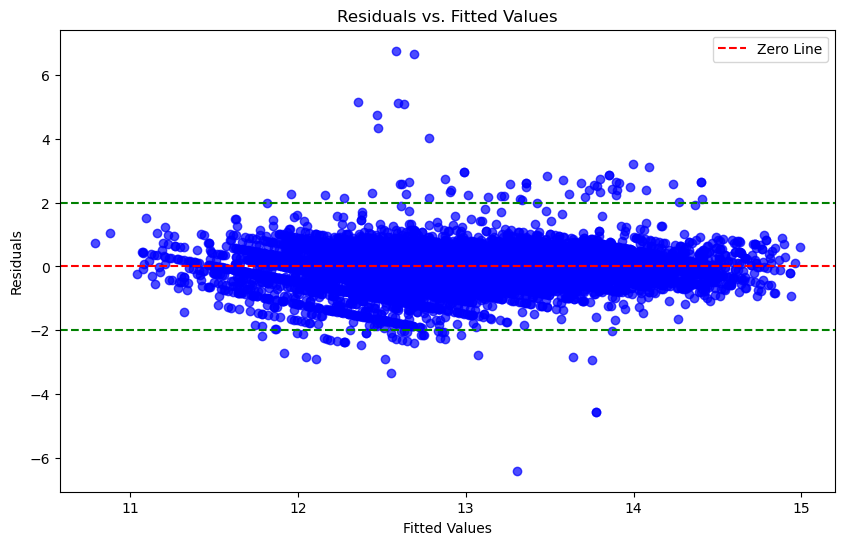

In [18]:
# Get fitted values and residuals
fitted_values = res.fittedvalues
residuals = res.resid

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=2, color='g', linestyle='--') # y = 2
plt.axhline(y=-2, color='g', linestyle='--') # y= -2
plt.legend()
plt.show()

In [ ]:
stepwise regression pour ajouter les amenites (reg2)

petite discussion sur la colombie et les amenites pour le developpement 

donc choix d'un vecteur d'amenites controles : on revient a une regression baseline 

In [ ]:
on ajoute ce vecteur de controle a notre regression sur loyers imputes (reg1)

Notre specification : l'equation
